# **Short notes on Probability tools**
---
 
 
- Copyright (c) Lukas Gonon, 2024. All rights reserved

- Author: Lukas Gonon <l.gonon@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

We provide here a brief overview of standard results in probability theory
needed for this course.

## PDF, CDF and characteristic functions

We denote by $X$ a random variable, that is (informally) a variable that can take different values, each assigned with a different probability.
We define the cumulative distribution function $F:\mathbb{R}\to[0,1]$ of $X$ by
$$
F(x):=\mathbb{P}\left(X\leq x\right),\qquad\text{for all }x\in\mathbb{R}.
$$
The function $F$ is increasing and right-continuous and satisfies the identities 
$\lim\limits_{x\downarrow-\infty} F(x)=0$ and $\lim\limits_{x\uparrow\infty} F(x)=1$.
If the function $F$ is absolutely continuous, 
then the random variable $X$ has a probability density function $f:\mathbb{R}\to[0,\infty)$ defined by
$f(x)=F'(x)$, for all real number $x \in \mathbb{R}$.
Note that this in particular implies the equality $F(x)=\int_{-\infty}^{x}f(u)\mathrm{d} u$.

Given a random variable $X$, whenever they exist, we can define the following statistics:

- Mean: $\mathbb{E}[X]$;

- Variance: $\mathbb{V}[X]:=\mathbb{E}\Big[\left(X - \mathbb{E}[X]\right)^2\Big]$

- Standard deviation: $\sigma_{X}:=\sqrt{\mathbb{V}[X]}$;

- Skewness: $\displaystyle \mathcal{S}^{X}:=\frac{\mathbb{E}\Big[\left(X - \mathbb{E}[X]\right)^3\Big]}{\mathbb{V}[X]^{3/2}}
= \mathbb{E}\left[\left(\frac{X - \mathbb{E}[X]}{\sigma_{X}}\right)^3\right]$;

- Kurtosis: $\displaystyle \kappa^{X}:=\frac{\mathbb{E}\Big[\left(X - \mathbb{E}[X]\right)^4\Big]}{\mathbb{V}[X]^2}
= \mathbb{E}\left[\left(\frac{X - \mathbb{E}[X]}{\sigma_{X}}\right)^4\right]$;

- Excess Kurtosis: $\kappa_{+}^{X} := \kappa_{X} - 3$. The Kurtosis measures the fatness of a distribution tails.

Distributions can be classified as follows:
- Mesokurtic ($\kappa_+^{X} = 0$): the Gaussian distribution for example;
- Leptokurtic ($\kappa_+^{X} > 0$) distributions correspond to fat tails, and are of fundamental importance to describe returns of financial assets (in particular on Equity markets). The Student, Poisson, Laplace or Exponential distributions all belong to this category;
- Platykurtic ($\kappa_+^{X} < 0$) correspond to thin-tail distributions, such as the uniform distribution.

## Gaussian distribution

A random variable $X$ is said to have a Gaussian distribution (or Normal distribution) with mean $\mu\in\mathbb{R}$
and variance $\sigma^2>0$, 
and we write $X\sim\mathcal{N}\left(\mu,\sigma^2\right)$ 
if and only if its density reads
$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right),
\qquad\text{for all }x\in\mathbb{R}.$$
For such a random variable, the following identities are obvious:
$$
\mathbb{E}\left[\mathrm{e}^{\mathrm{i} uX}\right] = \exp\left(\mathrm{i} \mu u -\frac{1}{2}u^2\sigma^2\right),
\qquad\text{and}\qquad
\mathbb{E}\left[\mathrm{e}^{uX}\right] = \exp\left(\mu u +\frac{1}{2}u^2\sigma^2\right),
$$
for all $u\in\mathbb{R}$. 
The first quantity is the characteristic function whereas the second one is the Laplace transform or the random variable.
If $X\in\mathcal{N}\left(\mu,\sigma^2\right)$, then the random variable $Y:=\exp(X)$ is said to be lognormal and
$$
\mathbb{E}[Y]=\exp\left(\mu+\frac{1}{2}\sigma^2\right)
\qquad\text{and}\qquad
\mathbb{E}\left[Y^2\right]=\exp\left(2\mu+2\sigma^2\right).$$

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

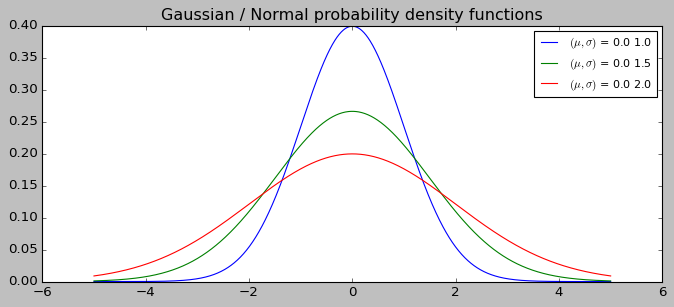

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
mus = [0.]#np.linspace(-1, 1, 1)
sigmas = np.linspace(1., 2., 3)
xx = np.linspace(-5, 5, 1000)

for mu in mus:
    for sigma in sigmas:
        ax.plot(xx, norm.pdf(xx, mu, sigma), label=r'$(\mu,\sigma)$ = %.1f %.1f' %(mu,sigma))
plt.legend(loc='best', fontsize="10")
plt.title("Gaussian / Normal probability density functions")
plt.show()

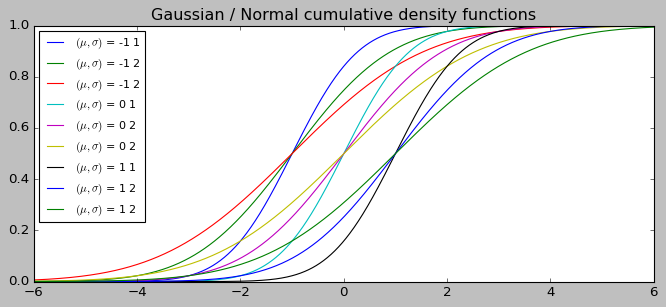

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
mus = np.linspace(-1, 1, 3)
sigmas = np.linspace(1., 2., 3)
xx = np.linspace(-6, 6, 1000)

for mu in mus:
    for sigma in sigmas:
        ax.plot(xx, norm.cdf(xx, mu, sigma), label=r'$(\mu,\sigma)$ = %.0f %.0f' %(mu,sigma))
plt.legend(loc='best', fontsize="10")
plt.title("Gaussian / Normal cumulative density functions")
plt.show()

## Bernoulli and Binomial distributions

A random variable is said to follow a Bernoulli distribution with probability $p \in [0,1]$ (which we denote $\mathcal{B}(p)$) if it takes values in $\{0,1\}$ and 
$\mathbb{P}[X=0] = p$ while $\mathbb{P}[X=1] = 1-p$.

Let $(X_i)_{i=1,\ldots,n}$ be a sequence of independent and identically distributed (iid) random variables with common distribution $\mathcal{B}(p)$, then
$$
S_n := \sum_{i=1}^{n}X_i
$$
follows a Binomial distribution with parameters $n$ and $p$, which we denote by
$\mathcal{B}(n,p)$.

In [7]:
from scipy.stats import bernoulli, binom

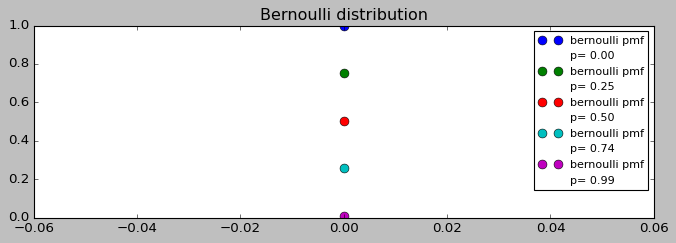

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
pp = np.linspace(.001, .99, 5)

for p in pp:
    xx = np.arange(bernoulli.ppf(0.0001, p), bernoulli.ppf(0.9999, p))
    plt.plot(xx, bernoulli.pmf(xx, p), 'o', ms=8, label='bernoulli pmf')
    plt.vlines(xx, 0, bernoulli.pmf(xx, p), lw=0, label='p= %.2f' %p)
plt.legend(loc='best', fontsize="10")
plt.title("Bernoulli distribution")
plt.show()

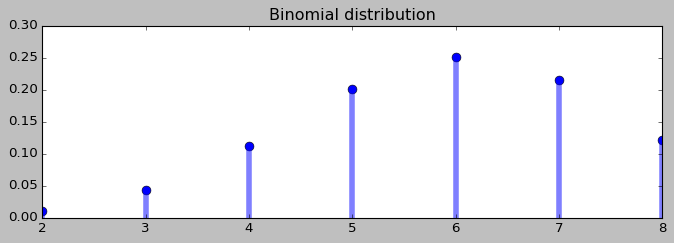

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
n, p = 10, 0.6
xx = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(xx, binom.pmf(xx, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(xx, 0, binom.pmf(xx, n, p), colors='b', lw=5, alpha=0.5)
plt.title("Binomial distribution")
plt.show()

## Exercises

(i) If $X\sim\mathcal{B}(p)$, compute $\mathbb{E}[X]$ and $\mathbb{V}[X]$.

(ii) If $X\sim\mathcal{B}(n,p)$, compute $\mathbb{E}[X]$ and $\mathbb{V}[X]$.

(iii) What can you say about $X\sim\mathcal{B}(p)$ when $p=0$ and when $p=1$?

(iv) Let $X\sim\mathcal{N}(\mu,\sigma^2)$ with $\sigma>0$. From the definition of the density function above, compute from first principles $\mathbb{E}[X]$ and $\mathbb{V}[X]$.